In [85]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [86]:
# Load data
data = pd.read_csv(r"Sample - Superstore.csv", encoding='latin1')

In [87]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [89]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [90]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Data Preprocessing

In [91]:

# إزالة Outliers
data = data[(data['Profit'] > data['Profit'].quantile(0.01)) & 
            (data['Profit'] < data['Profit'].quantile(0.99))]

# Convert to datetime
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

# Extract features
data["Order_Year"] = data["Order Date"].dt.year
data["Order_Month"] = data["Order Date"].dt.month
data["Order_Day"] = data["Order Date"].dt.day
data["Order_DayOfWeek"] = data["Order Date"].dt.dayofweek
data["Order_Quarter"] = data["Order Date"].dt.quarter
data["Shipping_Days"] = (data["Ship Date"] - data["Order Date"]).dt.days

# Cyclical encoding
data["Month_sin"] = np.sin(2 * np.pi * data["Order_Month"] / 12)
data["Month_cos"] = np.cos(2 * np.pi * data["Order_Month"] / 12)
data["DayOfWeek_sin"] = np.sin(2 * np.pi * data["Order_DayOfWeek"] / 7)
data["DayOfWeek_cos"] = np.cos(2 * np.pi * data["Order_DayOfWeek"] / 7)

# Drop unused columns
data = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 
                  'Postal Code', 'Product ID'], axis=1)

# --- Encoding ---
# One-hot for small categories
data = pd.get_dummies(data, columns=["Category", "Sub-Category", 
                                     "Country", "Region", 
                                     "Ship Mode", "Segment"], dtype=int)

# Target Encoding for high cardinality features
for col in ["State", "City", "Product Name"]:
    mean_profit = data.groupby(col)["Profit"].mean()
    data[col] = data[col].map(mean_profit)

# Split data
y = data["Profit"]
X = data.drop(["Profit", "Order Date", "Ship Date"], axis=1)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models and Results

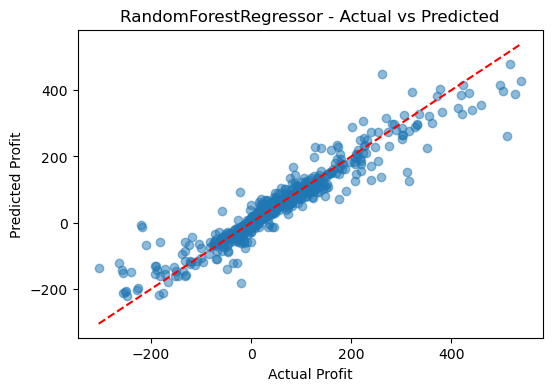

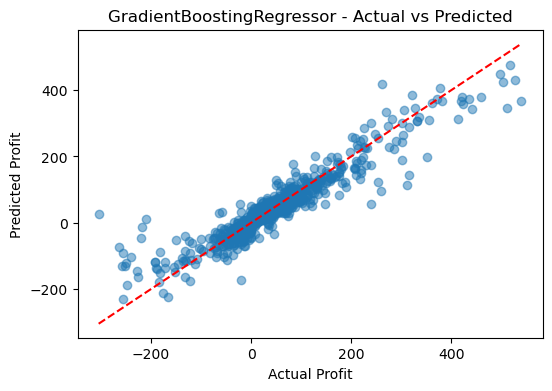

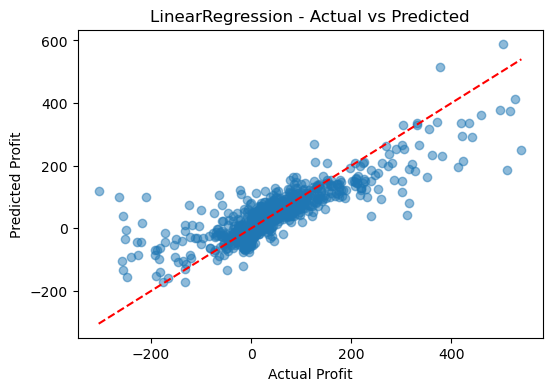

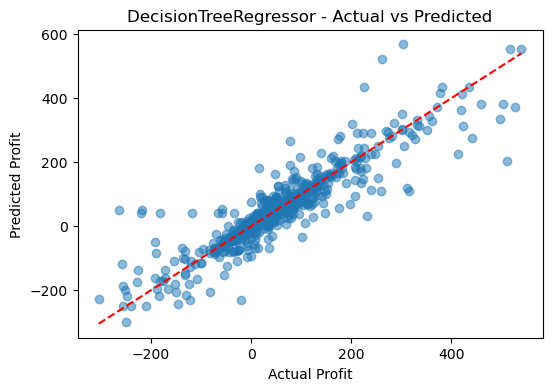

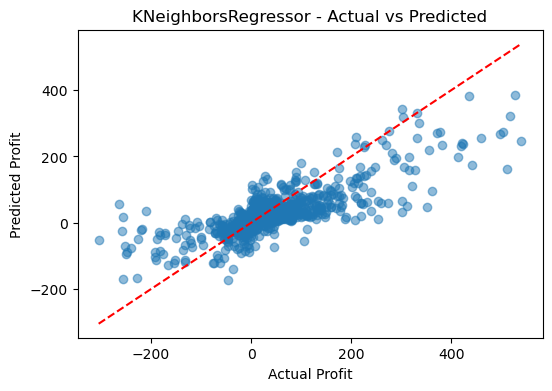

                       Model  Train R2   Test R2        MAE       RMSE
0      RandomForestRegressor  0.985032  0.912379   8.352214  21.855034
1  GradientBoostingRegressor  0.912540  0.878477  12.485733  25.738022
3      DecisionTreeRegressor  1.000000  0.827833  11.352904  30.635271
2           LinearRegression  0.658205  0.692964  23.544159  40.911102
4        KNeighborsRegressor  0.719466  0.594743  25.832163  47.001508


In [92]:
# Models
models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "KNeighborsRegressor": KNeighborsRegressor()
}

results = []

# Training + Evaluation + Visualization
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results.append({
        "Model": name,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "MAE": mae,
        "RMSE": rmse
    })

    # Actual vs Predicted plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.xlabel("Actual Profit")
    plt.ylabel("Predicted Profit")
    plt.title(f"{name} - Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

# Results table
results_data = pd.DataFrame(results)
print(results_data.sort_values(by="Test R2", ascending=False))

In [93]:
import joblib
best_model=RandomForestRegressor()
joblib.dump(best_model, "super_store_model.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']